<a href="https://colab.research.google.com/github/dasdasqs2/pdm05/blob/master/py-tensorflow/tf2_5_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)
tf.random.set_seed(0)

2.3.0


## **데이터 로딩, 정규화**

In [2]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1) #'1'은 color channel, 1 = gray scale/ 3 = RGB channel
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11493376/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [3]:
# One-Hot-Encoding -> 확률론적인 예측을 위해
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- one random number
- 10 representative numbers

51457


<function matplotlib.pyplot.show>

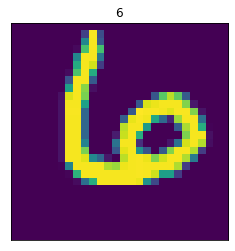

In [4]:
# Code here!
# display one random image from the training set:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

idx = np.random.randint(0,X_train.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #cmap=plt.get_cmp('gray')
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show

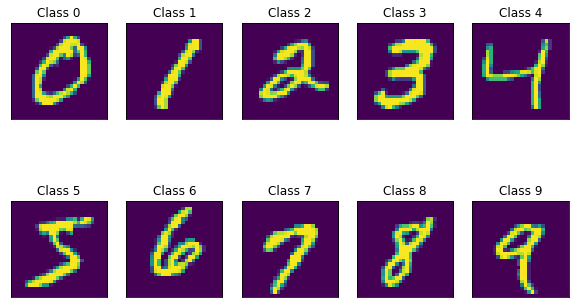

In [5]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0])
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import Conv2D, MaxPool2D

In [6]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

##**CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [7]:
# 'filter' = 뉴런의 개수
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    Dense(128, activation='relu'),
    Dropout(0.25), 
    Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [8]:
c1f2.summary() #Flatten 때문에 parameter가 80만개로 늘어남

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [9]:
32*14*14, 32*14*14*128 + 128

(6272, 802944)

In [10]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1745 - accuracy: 0.9481
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9801
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9890
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0215 - accuracy: 0.9927
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9936
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0141 - accuracy: 0.9952
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [11]:
c1f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0487 - accuracy: 0.9899


[0.04871316999197006, 0.9898999929428101]

## **CNN1 + FCN3**

In [12]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [13]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [14]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1838 - accuracy: 0.9436
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0642 - accuracy: 0.9805
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9868
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9898
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0207 - accuracy: 0.9931
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0167 - accuracy: 0.9949
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0144 - accuracy: 0.9954
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

In [15]:
c1f3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0618 - accuracy: 0.9891


[0.061843615025281906, 0.9890999794006348]

## **CNN2 + FCN2**

In [16]:
#filters = 뉴런의 개수
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [17]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [18]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1404 - accuracy: 0.9573
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0491 - accuracy: 0.9846
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9944
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0152 - accuracy: 0.9949
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0124 - accuracy: 0.9958
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9962
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.009

In [19]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0348 - accuracy: 0.9933


[0.03476310148835182, 0.9933000206947327]

## **CNN2 + FCN3**

In [20]:
#filters = 뉴런의 개수
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.25),
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [21]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               803072    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [22]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1585 - accuracy: 0.9519
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0532 - accuracy: 0.9839
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9884
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0311 - accuracy: 0.9908
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9927
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9933
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9943
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9955
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0134 - accuracy: 0.9960
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.011

In [23]:
c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0454 - accuracy: 0.9915


[0.045407362282276154, 0.9915000200271606]

# **[DIY] Hidden layer에 따른 정확도**

In [24]:
c1f2score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3score = c2f3.evaluate(X_test, y_test, batch_size = 32)


313/313 [==============================] - 1s 2ms/step - loss: 0.0454 - accuracy: 0.9915


In [25]:
accuracy = [c1f2score[1],c1f3score[1],c2f2score[1],c2f3score[1]]
accuracy

[0.9898999929428101,
 0.9890999794006348,
 0.9933000206947327,
 0.9915000200271606]

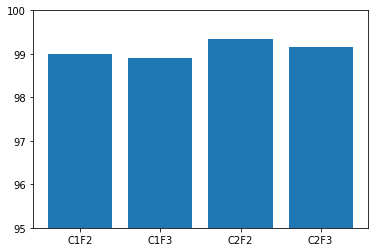

In [26]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim(95,100)
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [27]:
c2f3.save('cnn_best.hdf5')

In [28]:
from keras.models import load_model

model = load_model('cnn_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0454 - accuracy: 0.9915


[0.045407362282276154, 0.9915000200271606]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [29]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0371 - val_accuracy: 0.9931
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0382 - val_accuracy: 0.9925
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0404 - val_accuracy: 0.9918
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0451 - val_accuracy: 0.9918
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0452 - val_accuracy: 0.9920
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0380 - val_accuracy: 0.9928
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.0479 - val_accuracy:

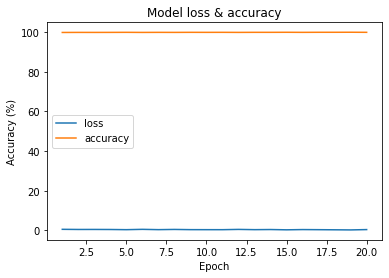

In [30]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [33]:
vloss_list = [100 * i for i in hist.history['loss']]
vacc_list = [100 * i for i in hist.history['accuracy']]

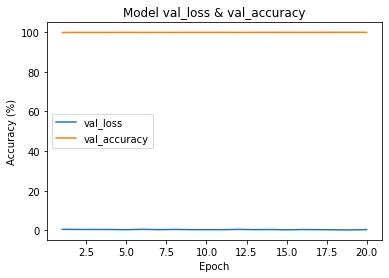

In [34]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [37]:
# Code here!
hist2 = c2f3.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0682 - val_accuracy: 0.9928
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0051 - accuracy: 0.9989 - val_loss: 0.0664 - val_accuracy: 0.9917
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.0699 - val_accuracy: 0.9935
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.0726 - val_accuracy: 0.9919
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0633 - val_accuracy: 0.9937
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0729 - val_accuracy: 0.9931
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0047 - accuracy: 0.9988 - val_loss: 0.0718 - val_accuracy:

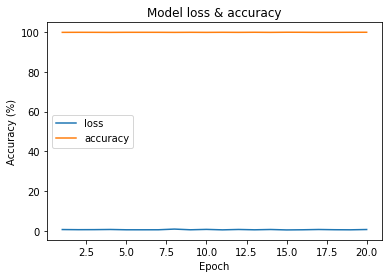

In [38]:
# Plot loass and accuracy
# Plot training & validation accuracy values

epochs = 20
loss_list = [100 * i for i in hist2.history['loss']]
acc_list = [100 * i for i in hist2.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [39]:
vloss_list = [100 * i for i in hist2.history['val_loss']]
vacc_list = [100 * i for i in hist2.history['val_accuracy']]

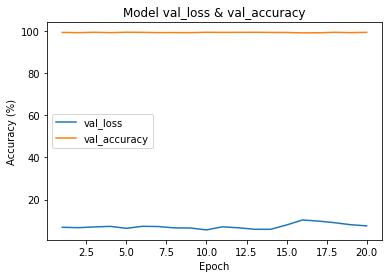

In [40]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

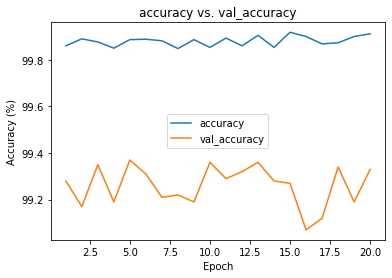

In [41]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')